
(himmelblau)=
## Himmelblau's function

Himmelblau's function is another famous mathematical function used as a benchmark problem in optimization. It's named after David Mautner Himmelblau, who introduced it in 1972. The function is defined as follows:

```{figure} ./../img/%202024-04-30-14-55-45.png.png
---
align: center
---

Himmelblau's function
Source: https://commons.wikimedia.org/wiki/File:Himmelblau_function.svg.
Image by Morn the Gorn. Released to the public domain

```

Although this function seems simpler in comparison to the Eggholder function, it draws
interest as it is multi-modal, in other words, it has more than one global minimum. To be
exact, the function has four global minima evaluating to 0, which can be found in the
following locations:

```
x=3.0, y=2.0
x=−2.805118, y=3.131312
x=−3.779310, y=−3.283186
x=3.584458, y=−1.848126
```

Which can be despicted here:

```{figure} ./../img/2024-04-30-15-25-27.png
---
align: center
---

Contour diagram of Himmelblau's function
Source: https://commons.wikimedia.org/wiki/File:Himmelblau_contour.svg. Image by: Nicoguaro.
Licensed under Creative Commons CC BY 4.0: https://creativecommons.org/licenses/by/4.0/deed.en.

```



```{math}
f(x,y) = (x^2 + y - 11)^2 + (x + y^2 - 7)^2 
```


Let's break it down:

1. **The Structure**: Himmelblau's function is made up of two polynomial terms, each squared and added together.

2. **The Variables**: The function depends on two variables, \( x \) and \( y \), which represent coordinates on a 2D plane.

3. **The Squares**: Each term in the function is squared. Squaring ensures that all parts of the function are positive, which can create multiple local minima and maxima.

4. **The Constants**: The numbers 11 and 7 in the function are constants.

5. **The Summation**: The squared terms are added together to form a single value, which represents the height of the function's surface at a given point \( (x,y) \).

6. **The Objective**: The goal is to find the minimum value of the function, which corresponds to the lowest point on its surface.

Himmelblau's function is particularly interesting because it has four identical local minima, each with a value of 0, and one global minimum also at 0. These minima are located at the points:

```{math}
(3, 2), \ (-2.805118, 3.131312), \ (-3.779310, -3.283186), \ \text{and} \ (3.584428, -1.848126)
```

These points are like valleys in the landscape represented by the function, and finding them can be challenging due to the function's complex structure with multiple hills and valleys.

In optimization, scientists and engineers use Himmelblau's function to test and compare different optimization algorithms. The efficiency of an algorithm is measured by how quickly and accurately it can find the global minimum (the lowest point) of the function. If an algorithm can efficiently navigate the landscape of Himmelblau's function to find the minima, it's likely to perform well on other optimization problems too.


gen	nevals	min     	avg    
0  	300   	0.077887	138.646
1  	256   	0.077887	70.3018
2  	261   	0.0549376	45.3529
3  	260   	0.0549376	34.0376
4  	253   	0.0421103	21.4902
5  	259   	0.00375114	21.5907
6  	255   	0.00163305	17.3338
7  	265   	0.00163305	19.3309
8  	252   	0.00163305	15.1737
9  	249   	0.000356589	13.0519
10 	258   	0.000356589	13.6612
11 	257   	0.00027667 	17.1779
12 	256   	0.00027667 	13.212 
13 	255   	7.48096e-05	14.0379
14 	254   	7.48096e-05	10.8216
15 	261   	2.53197e-05	8.90194
16 	258   	2.53197e-05	7.73907
17 	262   	2.53197e-05	7.43993
18 	258   	2.53197e-05	7.086  
19 	250   	7.19839e-06	5.91175
20 	252   	4.87197e-06	6.0666 
21 	256   	2.2194e-06 	4.83019
22 	252   	1.41761e-06	6.06226
23 	260   	1.41761e-06	6.66497
24 	258   	1.30806e-06	3.77568
25 	256   	1.30806e-06	3.44466
26 	264   	6.64878e-08	6.49944
27 	255   	6.64878e-08	5.88264
28 	257   	6.64878e-08	2.79407
29 	263   	6.64878e-08	4.97824
30 	252   	6.64878e-08	4.42222
31 	246   	6.09978e-08	4.72

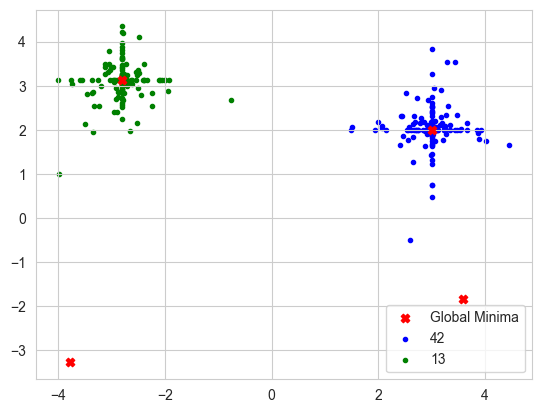

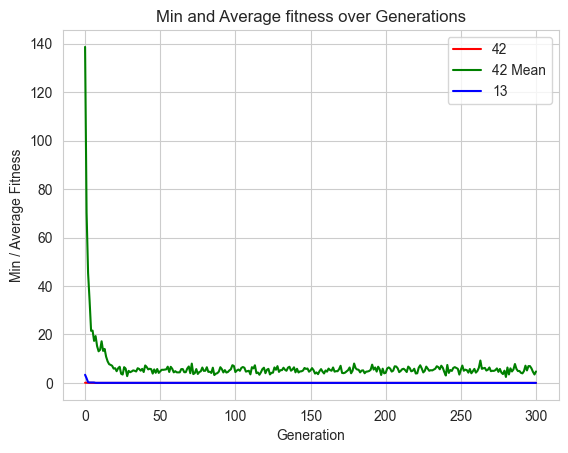

In [2]:
from deap import base
from deap import creator
from deap import tools

import random
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import elitism

def run_himmelblau_optimization_genetic(DIMENSIONS = 2, BOUND_LOW = -5.0, BOUND_UP = 5.0, POPULATION_SIZE = 300, P_CROSSOVER = 0.9, P_MUTATION = 0.5, MAX_GENERATIONS = 300, HALL_OF_FAME_SIZE = 30, CROWDING_FACTOR = 20.0, RANDOM_SEED = 42):

    random.seed(RANDOM_SEED)

    toolbox = base.Toolbox()

    # define a single objective, minimizing fitness strategy:
    creator.create("FitnessMin", base.Fitness, weights=(-1.0,))

    # create the Individual class based on list:
    creator.create("Individual", list, fitness=creator.FitnessMin)


    # helper function for creating random float numbers uniformaly distributed within a given range [low, up]
    # it assumes that the range is the same for every dimension
    def randomFloat(low, up):
        return [random.uniform(a, b) for a, b in zip([low] * DIMENSIONS, [up] * DIMENSIONS)]

    # create an operator that randomly returns a float in the desired range and dimension:
    toolbox.register("attr_float", randomFloat, BOUND_LOW, BOUND_UP)

    # create the individual operator to fill up an Individual instance:
    toolbox.register("individualCreator", tools.initIterate, creator.Individual, toolbox.attr_float)

    # create the population operator to generate a list of individuals:
    toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)


    # Himmelblau function as the given individual's fitness:
    def himmelblau(individual):
        x = individual[0]
        y = individual[1]
        f = (x ** 2 + y - 11) ** 2 + (x + y ** 2 - 7) ** 2
        return f,  # return a tuple

    toolbox.register("evaluate", himmelblau)

    # genetic operators:
    toolbox.register("select", tools.selTournament, tournsize=2)
    toolbox.register("mate", tools.cxSimulatedBinaryBounded, low=BOUND_LOW, up=BOUND_UP, eta=CROWDING_FACTOR)
    toolbox.register("mutate", tools.mutPolynomialBounded, low=BOUND_LOW, up=BOUND_UP, eta=CROWDING_FACTOR, indpb=1.0/DIMENSIONS)


    # create initial population (generation 0):
    population = toolbox.populationCreator(n=POPULATION_SIZE)

    # prepare the statistics object:
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("min", np.min)
    stats.register("avg", np.mean)

    # define the hall-of-fame object:
    hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

    # perform the Genetic Algorithm flow with elitism:
    population, logbook = elitism.eaSimpleWithElitism(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION,
                                                ngen=MAX_GENERATIONS, stats=stats, halloffame=hof, verbose=True)

    # print info for best solution found:
    best = hof.items[0]
    print("-- Best Individual = ", best)
    print("-- Best Fitness = ", best.fitness.values[0])

    print("- Best solutions are:")
    for i in range(HALL_OF_FAME_SIZE):
        print(i, ": ", hof.items[i].fitness.values[0], " -> ", hof.items[i])


    # extract statistics:
    minFitnessValues, meanFitnessValues = logbook.select("min", "avg")
    return minFitnessValues, meanFitnessValues, population


minFitnessValues_42, meanFitnessValues_42, population_42 = run_himmelblau_optimization_genetic(RANDOM_SEED=42)

# random with seed 13 for comparison:
minFitnessValues_13, meanFitnessValues_13, population_13 = run_himmelblau_optimization_genetic(RANDOM_SEED=13)

# plot statistics:


# plot solution locations on x-y plane:
plt.figure(1)
globalMinima = [[3.0, 2.0], [-2.805118, 3.131312], [-3.779310, -3.283186], [3.584458, -1.848126]]
plt.scatter(*zip(*globalMinima), marker='X', color='red', zorder=1)
plt.scatter(*zip(*population_42), marker='.', color='blue', zorder=0)
plt.scatter(*zip(*population_13), marker='.', color='green', zorder=0)

# Legends and labels.
plt.legend(['Global Minima', '42', '13'])


plt.figure(2)
sns.set_style("whitegrid")
plt.plot(minFitnessValues_42, color='red')
plt.plot(meanFitnessValues_42, color='green')
plt.plot(minFitnessValues_13, color='blue')

plt.xlabel('Generation')
plt.ylabel('Min / Average Fitness')
plt.title('Min and Average fitness over Generations')

# Legends.
plt.legend(['42', '42 Mean', '13'])

plt.show()




## Using Niching and sharing to find Multiple Solutions

### TASK Complete the following method so that the following implementaiton: for optimizeHimmelblauSharing

```python
globalMaxima, population, hof, logbook, maxFitnessValues, meanFitnessValues = optimizeHimmelblauSharing()

# plot solution locations on x-y plane:
plt.figure(1)
plt.scatter(*zip(*globalMaxima), marker='x', color='red', zorder=1)
plt.scatter(*zip(*population), marker='.', color='blue', zorder=0)    # plot solution locations on x-y plane:

# plot best solutions locations on x-y plane:
plt.figure(2)
plt.scatter(*zip(*globalMaxima), marker='x', color='red', zorder=1)
plt.scatter(*zip(*hof.items), marker='.', color='blue', zorder=0)

# extract statistics:

# plot statistics:
plt.figure(3)
sns.set_style("whitegrid")
plt.plot(maxFitnessValues, color='red')
plt.plot(meanFitnessValues, color='green')
plt.xlabel('Generation')
plt.ylabel('Max / Average Fitness')
plt.title('Max and Average fitness over Generations')

plt.show()
```

```{figure} ./../img/2024-04-30-16-42-12.png
---
align: center
---

```

```{figure} ./../img/2024-04-30-16-42-35.png
---
align: center
---

```

Use the following base code

### Base Code

```python
from deap import base
from deap import creator
from deap import tools

import random
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import math
import elitism

def optimizeHimmelblauSharing(DIMENSIONS = 2, BOUND_LOW = -5.0, BOUND_UP = 5.0, POPULATION_SIZE = 300, P_CROSSOVER = 0.9, P_MUTATION = 0.5, MAX_GENERATIONS = 300, HALL_OF_FAME_SIZE = 30, CROWDING_FACTOR = 20.0, DISTANCE_THRESHOLD = 0.1, SHARING_EXTENT = 5.0, RANDOM_SEED = 42):

    random.seed(RANDOM_SEED)

    toolbox = base.Toolbox()

    # define a single objective, maximizing fitness strategy:
    creator.create("FitnessMax", base.Fitness, weights=(1.0,))

    # create the Individual class based on list:
    creator.create("Individual", list, fitness=creator.FitnessMax)


    # helper function for creating random float numbers uniformaly distributed within a given range [low, up]
    # it assumes that the range is the same for every dimension
    def randomFloat(low, up):
        return [random.uniform(a, b) for a, b in zip([low] * DIMENSIONS, [up] * DIMENSIONS)]

    # create an operator that randomly returns a float in the desired range and dimension:
    toolbox.register("attr_float", randomFloat, BOUND_LOW, BOUND_UP)

    # create the individual operator to fill up an Individual instance:
    toolbox.register("individualCreator", tools.initIterate, creator.Individual, toolbox.attr_float)

    # create the population operator to generate a list of individuals:
    toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)


    # 'Inverted' Himmelblau function as the given individual's fitness:
    def himmelblauInverted(individual):
        x = individual[0]
        y = individual[1]
        f = (x ** 2 + y - 11) ** 2 + (x + y ** 2 - 7) ** 2
        return 2000.0 - f,  # return a tuple

    toolbox.register("evaluate", himmelblauInverted)

    # TODO Cp,[;ete wraps the tools.selTournament() with fitness sharing
    # same signature as tools.selTournament()
    def selTournamentWithSharing(individuals, k, tournsize, fit_attr="fitness"):

        # get orig fitnesses:
        origFitnesses = [ind.fitness.values[0] for ind in individuals]

        # TODO Iterate over each individual, calculate the sharingSum as the sum of  (1 - distance / (SHARING_EXTENT * DISTANCE_THRESHOLD))  each time the distance is less than the treshhold
        # Distance calulcates as: math.sqrt(((individuals[i][0] - individuals[j][0]) ** 2) + ((individuals[i][1] - individuals[j][1]) ** 2))
        # apply sharing to each individual:
        for i in range(len(individuals)):
            sharingSum = 1


            # reduce fitness accordingly:
            individuals[i].fitness.values = origFitnesses[i] / sharingSum,

        # apply original tools.selTournament() using modified fitness:
        selected = tools.selTournament(individuals, k, tournsize, fit_attr)

        # retrieve original fitness:
        for i, ind in enumerate(individuals):
            ind.fitness.values = origFitnesses[i],

        return selected


    # TODO REWRITE Implement genetic operators: as: 
    # - Tournament selection with sharing torunament size 2
    # - Simulated Binary Crossover (SBX) with eta = CROWDING_FACTOR
    # - Polynomial mutation with eta = CROWDING_FACTOR
    # toolbox.register("select", selTournamentWithSharing, tournsize=2)
    # toolbox.register("mate", tools.cxSimulatedBinaryBounded, low=BOUND_LOW, up=BOUND_UP, eta=CROWDING_FACTOR)
    # toolbox.register("mutate", tools.mutPolynomialBounded, low=BOUND_LOW, up=BOUND_UP, eta=CROWDING_FACTOR, indpb=1.0/DIMENSIONS)



    # create initial population (generation 0):
    population = toolbox.populationCreator(n=POPULATION_SIZE)

    # prepare the statistics object:
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("max", np.max)
    stats.register("avg", np.mean)

    # define the hall-of-fame object:
    hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

    # perform the Genetic Algorithm flow with elitism:
    population, logbook = elitism.eaSimpleWithElitism(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION,
                                            ngen=MAX_GENERATIONS, stats=stats, halloffame=hof, verbose=True)

    # print info for best solution found:
    best = hof.items[0]
    print("-- Best Individual = ", best)
    print("-- Best Fitness = ", best.fitness.values[0])

    print("- Best solutions are:")
    for i in range(HALL_OF_FAME_SIZE):
        print(i, ": ", hof.items[i].fitness.values[0], " -> ", hof.items[i])

    globalMaxima = [[3.0, 2.0], [-2.805118, 3.131312], [-3.779310, -3.283186], [3.584458, -1.848126]]
    maxFitnessValues, meanFitnessValues = logbook.select("max", "avg")
    return globalMaxima, population, hof, logbook, maxFitnessValues, meanFitnessValues



if __name__ == "__main__":
    globalMaxima, population, hof, logbook, maxFitnessValues, meanFitnessValues = optimizeHimmelblauSharing()

    # plot solution locations on x-y plane:
    plt.figure(1)
    # TODO Rewrite the following code to plot the solutions and the global maxima
    # plt.scatter(*zip(*globalMaxima), marker='x', color='red', zorder=1)
    # plt.scatter(*zip(*population), marker='.', color='blue', zorder=0)    # plot solution locations on x-y plane:

    # plot best solutions locations on x-y plane:
    plt.figure(2)
    plt.scatter(*zip(*globalMaxima), marker='x', color='red', zorder=1)
    plt.scatter(*zip(*hof.items), marker='.', color='blue', zorder=0)

    # extract statistics:

    # TODO Rewrite plot statistics:
    plt.figure(3)
    sns.set_style("whitegrid")
    # plt.plot(maxFitnessValues, color='red')
    # plt.plot(meanFitnessValues, color='green')
    # plt.xlabel('Generation')
    # plt.ylabel('Max / Average Fitness')
    # plt.title('Max and Average fitness over Generations')

    plt.show()
```


### Solution

gen	nevals	max    	avg    
0  	300   	1999.92	1861.35
1  	256   	1999.92	1923.09
2  	261   	1999.95	1933.39
3  	260   	1999.95	1937.75
4  	257   	1999.95	1936.95
5  	254   	1999.95	1945.01
6  	253   	1999.97	1949.24
7  	257   	1999.97	1951.29
8  	253   	1999.97	1950.51
9  	255   	1999.97	1952.18
10 	252   	1999.97	1950.47
11 	259   	1999.97	1953.05
12 	254   	1999.97	1949.78
13 	263   	1999.98	1952.01
14 	262   	1999.98	1952.26
15 	254   	1999.98	1959.42
16 	256   	1999.98	1956.38
17 	253   	1999.98	1953.97
18 	260   	1999.98	1950.71
19 	258   	1999.98	1953.67
20 	250   	1999.98	1950.64
21 	261   	1999.98	1953.63
22 	256   	1999.98	1952.55
23 	262   	1999.98	1954.43
24 	252   	1999.98	1958.17
25 	259   	1999.98	1953.15
26 	253   	1999.98	1950.21
27 	257   	1999.98	1942.96
28 	243   	1999.98	1943.85
29 	258   	1999.98	1946.13
30 	255   	1999.98	1946.32
31 	250   	1999.98	1946.58
32 	255   	1999.98	1941.21
33 	256   	1999.98	1946.83
34 	251   	1999.98	1949.55
35 	257   	1999.98	1950.34
3

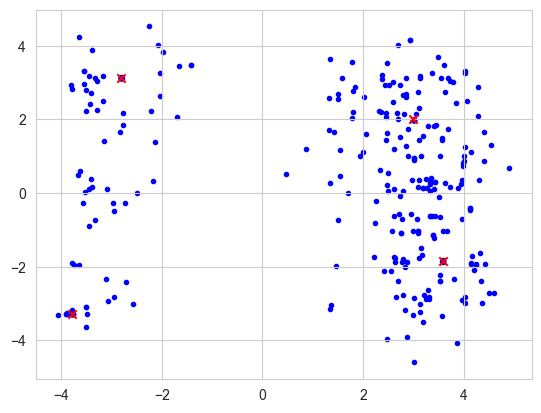

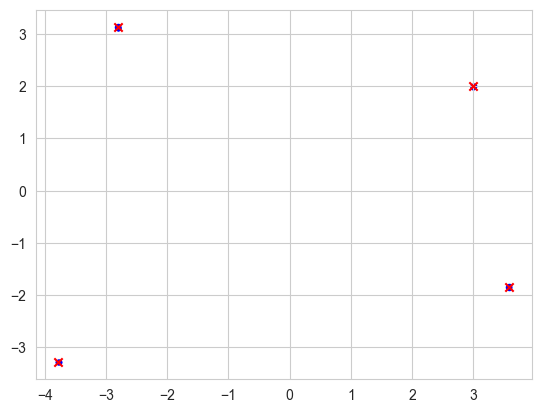

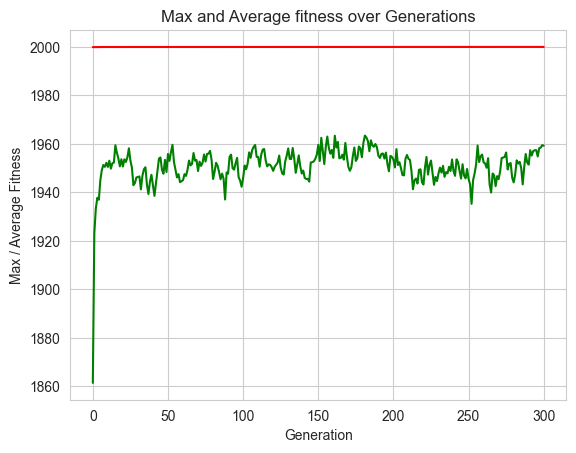

In [3]:
from deap import base
from deap import creator
from deap import tools

import random
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import math
import elitism

def optimizeHimmelblauSharing(DIMENSIONS = 2, BOUND_LOW = -5.0, BOUND_UP = 5.0, POPULATION_SIZE = 300, P_CROSSOVER = 0.9, P_MUTATION = 0.5, MAX_GENERATIONS = 300, HALL_OF_FAME_SIZE = 30, CROWDING_FACTOR = 20.0, DISTANCE_THRESHOLD = 0.1, SHARING_EXTENT = 5.0, RANDOM_SEED = 42):

    random.seed(RANDOM_SEED)

    toolbox = base.Toolbox()

    # define a single objective, maximizing fitness strategy:
    creator.create("FitnessMax", base.Fitness, weights=(1.0,))

    # create the Individual class based on list:
    creator.create("Individual", list, fitness=creator.FitnessMax)


    # helper function for creating random float numbers uniformaly distributed within a given range [low, up]
    # it assumes that the range is the same for every dimension
    def randomFloat(low, up):
        return [random.uniform(a, b) for a, b in zip([low] * DIMENSIONS, [up] * DIMENSIONS)]

    # create an operator that randomly returns a float in the desired range and dimension:
    toolbox.register("attr_float", randomFloat, BOUND_LOW, BOUND_UP)

    # create the individual operator to fill up an Individual instance:
    toolbox.register("individualCreator", tools.initIterate, creator.Individual, toolbox.attr_float)

    # create the population operator to generate a list of individuals:
    toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)


    # 'Inverted' Himmelblau function as the given individual's fitness:
    def himmelblauInverted(individual):
        x = individual[0]
        y = individual[1]
        f = (x ** 2 + y - 11) ** 2 + (x + y ** 2 - 7) ** 2
        return 2000.0 - f,  # return a tuple

    toolbox.register("evaluate", himmelblauInverted)

    # wraps the tools.selTournament() with fitness sharing
    # same signature as tools.selTournament()
    def selTournamentWithSharing(individuals, k, tournsize, fit_attr="fitness"):

        # get orig fitnesses:
        origFitnesses = [ind.fitness.values[0] for ind in individuals]

        # apply sharing to each individual:
        for i in range(len(individuals)):
            sharingSum = 1

            # iterate over all other individuals
            for j in range(len(individuals)):
                if i != j:
                    # calculate eucledean distance between individuals:
                    distance = math.sqrt(
                        ((individuals[i][0] - individuals[j][0]) ** 2) + ((individuals[i][1] - individuals[j][1]) ** 2))

                    if distance < DISTANCE_THRESHOLD:
                        sharingSum += (1 - distance / (SHARING_EXTENT * DISTANCE_THRESHOLD))

            # reduce fitness accordingly:
            individuals[i].fitness.values = origFitnesses[i] / sharingSum,

        # apply original tools.selTournament() using modified fitness:
        selected = tools.selTournament(individuals, k, tournsize, fit_attr)

        # retrieve original fitness:
        for i, ind in enumerate(individuals):
            ind.fitness.values = origFitnesses[i],

        return selected


    # genetic operators:
    toolbox.register("select", selTournamentWithSharing, tournsize=2)
    toolbox.register("mate", tools.cxSimulatedBinaryBounded, low=BOUND_LOW, up=BOUND_UP, eta=CROWDING_FACTOR)
    toolbox.register("mutate", tools.mutPolynomialBounded, low=BOUND_LOW, up=BOUND_UP, eta=CROWDING_FACTOR, indpb=1.0/DIMENSIONS)



    # create initial population (generation 0):
    population = toolbox.populationCreator(n=POPULATION_SIZE)

    # prepare the statistics object:
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("max", np.max)
    stats.register("avg", np.mean)

    # define the hall-of-fame object:
    hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

    # perform the Genetic Algorithm flow with elitism:
    population, logbook = elitism.eaSimpleWithElitism(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION,
                                            ngen=MAX_GENERATIONS, stats=stats, halloffame=hof, verbose=True)

    # print info for best solution found:
    best = hof.items[0]
    print("-- Best Individual = ", best)
    print("-- Best Fitness = ", best.fitness.values[0])

    print("- Best solutions are:")
    for i in range(HALL_OF_FAME_SIZE):
        print(i, ": ", hof.items[i].fitness.values[0], " -> ", hof.items[i])

    globalMaxima = [[3.0, 2.0], [-2.805118, 3.131312], [-3.779310, -3.283186], [3.584458, -1.848126]]
    maxFitnessValues, meanFitnessValues = logbook.select("max", "avg")
    return globalMaxima, population, hof, logbook, maxFitnessValues, meanFitnessValues



if __name__ == "__main__":
    globalMaxima, population, hof, logbook, maxFitnessValues, meanFitnessValues = optimizeHimmelblauSharing()

    # plot solution locations on x-y plane:
    plt.figure(1)
    plt.scatter(*zip(*globalMaxima), marker='x', color='red', zorder=1)
    plt.scatter(*zip(*population), marker='.', color='blue', zorder=0)    # plot solution locations on x-y plane:

    # plot best solutions locations on x-y plane:
    plt.figure(2)
    plt.scatter(*zip(*globalMaxima), marker='x', color='red', zorder=1)
    plt.scatter(*zip(*hof.items), marker='.', color='blue', zorder=0)

    # extract statistics:

    # plot statistics:
    plt.figure(3)
    sns.set_style("whitegrid")
    plt.plot(maxFitnessValues, color='red')
    plt.plot(meanFitnessValues, color='green')
    plt.xlabel('Generation')
    plt.ylabel('Max / Average Fitness')
    plt.title('Max and Average fitness over Generations')

    plt.show()